<a href="https://colab.research.google.com/github/agterzis/Machine-Learning/blob/main/%CE%9C%CE%B7%CF%87%CE%B1%CE%BD%CE%B9%CE%BA%CE%AE_%CE%9C%CE%AC%CE%B8%CE%B7%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
train_set, test_set = train_test_split(
    df,
    test_size=0.1,
    stratify=df['target'],
    random_state=0
)

In [5]:
# Διαχωρισμός δεδομένων
train_set, test_set = train_test_split(
    df,
    test_size=0.1,
    stratify=df['target'],
    random_state=0
)

print(f"Μέγεθος Train set: {train_set.shape}")
print(f"Μέγεθος Test set: {test_set.shape}")

Μέγεθος Train set: (6851, 5)
Μέγεθος Test set: (762, 5)


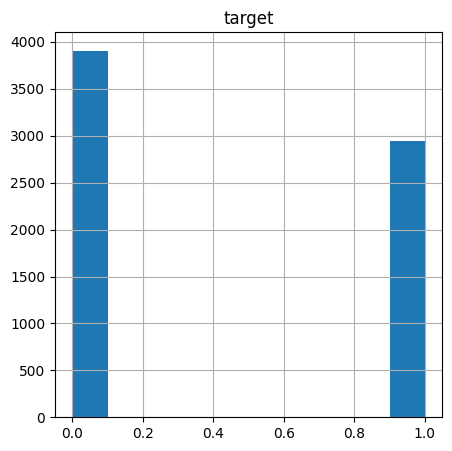

In [6]:
# Train Set Histogram
train_set.hist(column='target', figsize=(5, 5))
plt.show()

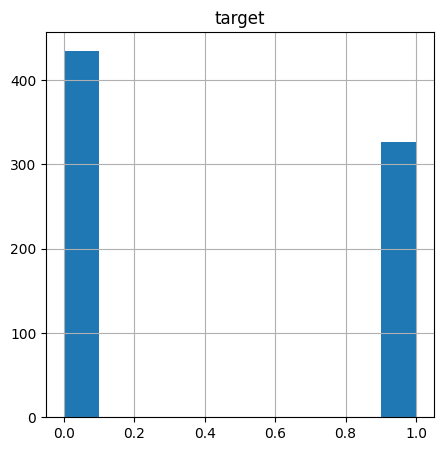

In [7]:
# Test Set Histogram
test_set.hist(column='target', figsize=(5, 5))
plt.show()

In [8]:
train_set = train_set.drop(columns=['location','id'], axis=1)
test_set = test_set.drop(columns=['location','id'], axis=1)

In [9]:
missing_values = train_set.isnull().sum()
print(f"Missing Values Train set: {missing_values}")

missing_values = test_set.isnull().sum()
print(f"\n Missing Values Test set: {missing_values}")

# Υπάρχουν ελλειπείς τιμές μόνο στην στήλη keyword
train_set.fillna('null', inplace=True)
test_set.fillna('null', inplace=True)

print("-------------------")

missing_values = train_set.isnull().sum()
print(f"\n Missing Values Train set: {missing_values}")

missing_values = test_set.isnull().sum()
print(f"\n Missing Values Test set: {missing_values}")


Missing Values Train set: keyword    54
text        0
target      0
dtype: int64

 Missing Values Test set: keyword    7
text       0
target     0
dtype: int64
-------------------

 Missing Values Train set: keyword    0
text       0
target     0
dtype: int64

 Missing Values Test set: keyword    0
text       0
target     0
dtype: int64


In [10]:
train_set['inputs'] = train_set['keyword'] + ' ' + train_set['text']
test_set['inputs'] = test_set['keyword'] + ' ' + test_set['text']

train_set = train_set.drop(columns=['keyword','text'], axis=1)
test_set = test_set.drop(columns=['keyword','text'], axis=1)

In [11]:
train_set.head()

,target,inputs
6669,1,threat Meek Mill responds to DrakeÛªs OVO Fes...
3940,0,flood survived the plague\nfloated the flood\n...
7217,0,weapons #Kick Hendrixonfire @'=BLACKCATS= | B...
2234,0,deluge Vince McMahon once again a billionaire:...
4233,0,hazardous Is it possible to sneak into a hospi...


In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def text_lowercase(text):
    return text.lower()

def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

def remove_unicode_and_noise(text):
    return text.encode("ascii", "ignore").decode()


def clean_text_pipeline(text):
    text = text_lowercase(text)           # 1. Μετατροπή σε πεζά
    text = replaceURL(text)              # 2. Αφαίρεση URL
    text = remove_html(text)              # 3. Αφαίρεση HTML
    text = remove_unicode_and_noise(text) # 4. Αφαίρεση Emojis/Unicode
    text = remove_punctuations(text)      # 5. Αφαίρεση σημείων στίξης
    text = remove_stopwords(text)         # 6. Αφαίρεση stopwords
    return text

# Εφαρμογή στα train και test sets
train_set['inputs_clean'] = train_set['inputs'].apply(clean_text_pipeline)
test_set['inputs_clean'] = test_set['inputs'].apply(clean_text_pipeline)

# Εμφάνιση αποτελεσμάτων (πριν και μετά)
print("Πριν:", train_set['inputs'].iloc[0])
print("Μετά:", train_set['inputs_clean'].iloc[0])

<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-534729077.py:14: SyntaxWarning: invalid escape sequence '\.'
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)


Πριν: threat Meek Mill responds to DrakeÛªs OVO Fest set with wedgie threat http://t.co/qqSKYbARNg
Μετά: threat meek mill responds drakes ovo fest set wedgie threat url


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Διαχωρισμός σε Inputs και Targets (Numpy arrays)

X_train_text = train_set['inputs_clean'].values
y_train = train_set['target'].values

X_test_text = test_set['inputs_clean'].values
y_test = test_set['target'].values

# 2. Αρχικοποίηση του TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# 3. Εφαρμογή fit_transform στο TRAIN set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)

# 4. Εφαρμογή μόνο transform στο TEST set
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Έλεγχος διαστάσεων
print("Διαστάσεις Train Input (Sparse Matrix):", X_train_tfidf.shape)
print("Διαστάσεις Train Target:", y_train.shape)
print("-" * 30)
print("Διαστάσεις Test Input (Sparse Matrix):", X_test_tfidf.shape)
print("Διαστάσεις Test Target:", y_test.shape)

Διαστάσεις Train Input (Sparse Matrix): (6851, 16569)
Διαστάσεις Train Target: (6851,)
------------------------------
Διαστάσεις Test Input (Sparse Matrix): (762, 16569)
Διαστάσεις Test Target: (762,)


In [14]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
model_lin = LinearSVC()

model_lin.fit(X_train_tfidf, y_train)

acc_lin = model_lin.score(X_test_tfidf, y_test)
acc_train_lin = model_lin.score(X_train_tfidf, y_train)

print(f"Train Accuracy: {acc_train_lin:.2%}")
print(f"Test Accuracy:  {acc_lin:.2%}")


Train Accuracy: 97.30%
Test Accuracy:  80.05%


In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

y_train_pred = linear_svc.predict(X_train_tfidf)
y_test_pred = linear_svc.predict(X_test_tfidf)

# Συνάρτηση για εκτύπωση αποτελεσμάτων
def print_metrics(y_true, y_pred, set_name):
    print(f"{set_name} Set Metrics")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f} \n")

print_metrics(y_train, y_train_pred, "Train")
print_metrics(y_test, y_test_pred, "Test")

Train Set Metrics
Accuracy:  0.9730
Precision: 0.9812
Recall:    0.9555
F1 Score:  0.9682 

Test Set Metrics
Accuracy:  0.8005
Precision: 0.7832
Recall:    0.7401
F1 Score:  0.7610 



In [16]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Μετατροπή σε array
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Scaling, απαραίτητο για PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dense)
X_test_scaled = scaler.transform(X_test_dense)

# PCA 95% διακύμανση
pca = PCA(n_components=0.95, random_state=0)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Αρχικά χαρακτηριστικά: {X_train_dense.shape[1]}")
print(f"Χαρακτηριστικά μετά το PCA (95% variance): {X_train_pca.shape[1]}")

Αρχικά χαρακτηριστικά: 16569
Χαρακτηριστικά μετά το PCA (95% variance): 4711


In [17]:
# LinearSVC με PCA
linear_svc_pca = LinearSVC(random_state=0, dual='auto')
linear_svc_pca.fit(X_train_pca, y_train)
y_pred_linear_pca = linear_svc_pca.predict(X_test_pca)

# SVC με RBF Kernel
rbf_svc_pca = SVC(kernel='rbf', random_state=0)
rbf_svc_pca.fit(X_train_pca, y_train)
y_pred_rbf_pca = rbf_svc_pca.predict(X_test_pca)

print("\n--- LinearSVC with PCA Results ---")
print(f"F1 Score: {f1_score(y_test, y_pred_linear_pca):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear_pca):.4f}")

print("\n--- SVC (RBF) with PCA Results ---")
print(f"F1 Score: {f1_score(y_test, y_pred_rbf_pca):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf_pca):.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



--- LinearSVC with PCA Results ---
F1 Score: 0.7156
Accuracy: 0.7507

--- SVC (RBF) with PCA Results ---
F1 Score: 0.6966
Accuracy: 0.7782


Τιμή gamma='scale': 0.00006
Τιμή gamma='auto':  0.00021


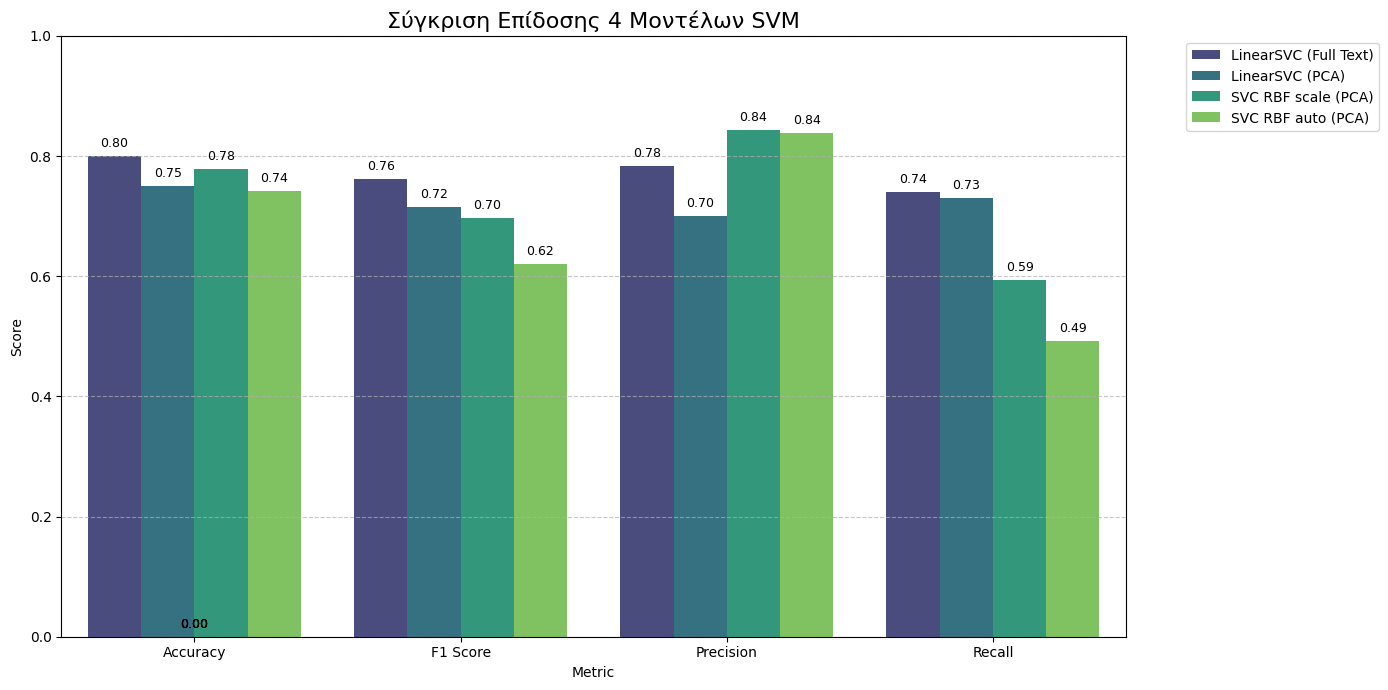

                   Model  Accuracy  F1 Score  Precision    Recall
0  LinearSVC (Full Text)  0.800525  0.761006   0.783172  0.740061
1        LinearSVC (PCA)  0.750656  0.715569   0.700880  0.730887
2    SVC RBF scale (PCA)  0.778215  0.696589   0.843478  0.593272
3     SVC RBF auto (PCA)  0.741470  0.620424   0.838542  0.492355


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Εμφάνιση τιμών γ
n_features = X_train_pca.shape[1]
var_X = X_train_pca.var()

print(f"Τιμή gamma='scale': {1 / (n_features * var_X):.5f}")
print(f"Τιμή gamma='auto':  {1 / n_features:.5f}")

# Εκπαίδευση SVC με γ='auto'
svc_auto = SVC(kernel='rbf', gamma='auto', random_state=0)
svc_auto.fit(X_train_pca, y_train)
y_pred_svc_auto = svc_auto.predict(X_test_pca)

# Συνάρτηση για καταγραφή μετρικών
def get_metrics(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred)
    }

results = []
results.append(get_metrics(y_test, y_test_pred, 'LinearSVC (Full Text)'))
results.append(get_metrics(y_test, y_pred_linear_pca, 'LinearSVC (PCA)'))
results.append(get_metrics(y_test, y_pred_rbf_pca, 'SVC RBF scale (PCA)'))
results.append(get_metrics(y_test, y_pred_svc_auto, 'SVC RBF auto (PCA)'))

# Μετατροπή σε DataFrame για plotting
df_results = pd.DataFrame(results)
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 7))
sns.barplot(x="Metric", y="Score", hue="Model", data=df_melted, palette="viridis")

plt.title('Σύγκριση Επίδοσης 4 Μοντέλων SVM', fontsize=16)
plt.ylim(0, 1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Εμφάνιση τιμών πάνω στις μπάρες
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points',
                       fontsize=9)

plt.tight_layout()
plt.show()

print(df_results)

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Μετατροπή των αραιών πινάκων TF-IDF σε πυκνούς (Dense arrays)
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Εκπαίδευση
gnb = GaussianNB()
gnb.fit(X_train_dense, y_train)

# Προβλέψεις
y_train_pred_gnb = gnb.predict(X_train_dense)
y_test_pred_gnb = gnb.predict(X_test_dense)

# Υπολογισμός και εκτύπωση μετρικών
def print_metrics(y_true, y_pred, set_name):
    print(f"--- {set_name} Set Metrics (GaussianNB) ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")
    print("-" * 40)

print_metrics(y_train, y_train_pred_gnb, "Train")
print_metrics(y_test, y_test_pred_gnb, "Test")

--- Train Set Metrics (GaussianNB) ---
Accuracy:  0.9209
Precision: 0.8445
Recall:    1.0000
F1 Score:  0.9157
----------------------------------------
--- Test Set Metrics (GaussianNB) ---
Accuracy:  0.6299
Precision: 0.5474
Recall:    0.7951
F1 Score:  0.6484
----------------------------------------
